Created on 2023-08-21
This notebook ...

TODO: Notebook description

In [1]:
## Library imports
import os
from utils import select_files, create_directory, getclosest_ij
from helper import create_fieldset, create_particleset, create_kernel, load_default_settings, load_test_settings
from parcels import ParticleFile
#from plotting import plot_release_locations
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import numpy as np

In [2]:
os.getcwd()

'/Users/denes001/Research/Projects/PlasticParcels/PlasticParcels/src/trajectory'

# User options
TODO: Write a description here

In [3]:
## User options
testing_version = 'local'
if testing_version == 'local':
    user_settings = {'user': 'denes001',
                    'output_directory': '../../data/output_data/',
                    'fig_directory': '../../fig/',
                    }
else:
    user_settings = {'user': 'denes001',
                    'output_directory': '/storage/shared/oceanparcels/output_data/data_Michael/PlasticTransportKernels/data/output_data/',
                    'fig_directory': '/storage/shared/oceanparcels/output_data/data_Michael/PlasticTransportKernels/fig/',
                    }

## Create directories if missing
create_directory(user_settings['output_directory'])
create_directory(user_settings['fig_directory'])

# Model settings
TODO: Write a description here

In [4]:
## Model settings
model_settings, particle_settings = load_test_settings()

In [5]:
fieldset = create_fieldset(model_settings, particle_settings)

         It will be opened with no decoding. Filling values might be wrongly parsed.


# Particleset settings
TODO: Write description here -- user must define particle release locations

In [6]:
## Set particle release locations
n_particles = 5
lons = np.linspace(2,7,n_particles)
lats = np.linspace(40,42,n_particles)
depths = np.random.uniform(0,50, n_particles)
#times = np.linspace(0,50000,n_particles)

release_locations = {'lons': lons,
                     'lats': lats,
                     'depths': depths,
#                     'times': times
}   


## Show particle release locations
#plot_release_locations(release_locations)

In [7]:
# Other settings
wind_test = np.random.uniform(0,0.05,n_particles)
density_test = np.random.uniform(1000,1050,n_particles)
diameter_test = np.random.uniform(0.00001, 0.01, n_particles)
## Particleset settings
particle_settings.update({'release_locations': release_locations, # A dictionary of lons, lats, depths (optional), and times (optional)
                          'windage_coefficient': wind_test, # A float or Nx1 array of windage coefficients, values in [0,1] [percent of wind speed]
                          'particle_density': density_test, # A float or Nx1 array of particle densities [kg m-3]
                          'particle_diameter': diameter_test, # A float or Nx1 array of particle lengths [m]
                          'write_output_option': 'all' # Option to write variables. Options: 'none' (default), 'tracer' (saves tracer fields), 'dynamic' (saves all variables that change spatiotemporally), 'all' (saves all variables)
                           })


pset = create_particleset(fieldset, particle_settings)

/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


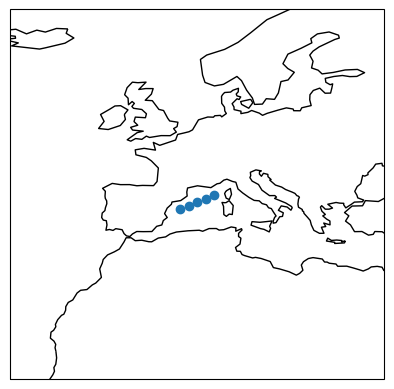

In [8]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(pset.lon, pset.lat, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([np.min(pset.lon)-25, np.max(pset.lon)+25, np.min(pset.lat)-25, np.max(pset.lat)+25])
plt.show()

# Kernel creation
This should be pretty simple based on the flags above

In [9]:
kernels = create_kernel(fieldset, pset)
kernels

[<function kernels.PolyTEOS10_bsq(particle, fieldset, time)>,
 <function parcels.application_kernels.advection.AdvectionRK4_3D(particle, fieldset, time)>,
 <function kernels.biofouling(particle, fieldset, time)>,
 <function kernels.Stokes_drift(particle, fieldset, time)>,
 <function kernels.windage_drift(particle, fieldset, time)>,
 <function kernels.vertical_mixing(particle, fieldset, time)>]

In [10]:
len_kernels = len(kernels)

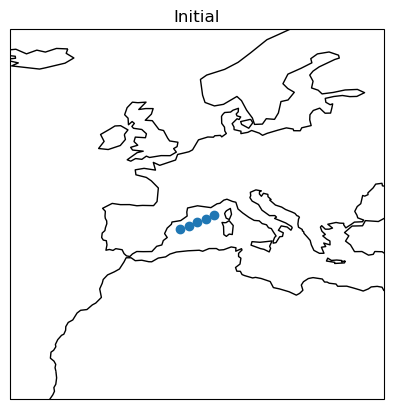

INFO: Compiled ArrayJITParticlePolyTEOS10_bsq ==> /var/folders/40/_dzhm_n16gn9bfdpc_8tcpf00000gp/T/parcels-502/libd4424edcfc3d320a151d55aee1cd63ce_0.so
INFO: Output files are stored in ../../data/output_data/PolyTEOS10_bsq.zarr.
100%|██████████| 259200.0/259200.0 [00:11<00:00, 23073.65it/s]  
/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


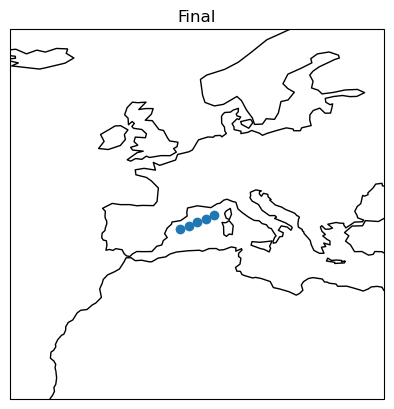

Success with PolyTEOS10_bsq


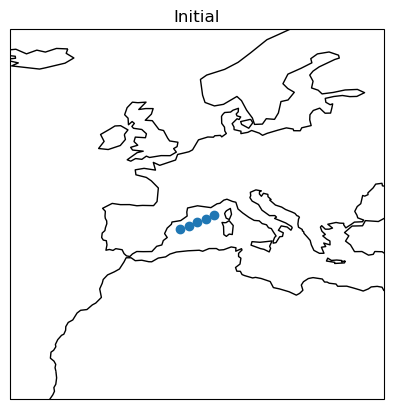

INFO: Compiled ArrayJITParticleAdvectionRK4_3D ==> /var/folders/40/_dzhm_n16gn9bfdpc_8tcpf00000gp/T/parcels-502/libf234a8c711b3002e7ddd0a2e777421a8_0.so
INFO: Output files are stored in ../../data/output_data/AdvectionRK4_3D.zarr.
100%|██████████| 259200.0/259200.0 [00:11<00:00, 22524.06it/s] 
/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


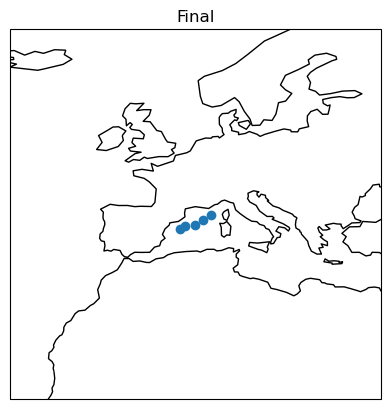

Success with AdvectionRK4_3D


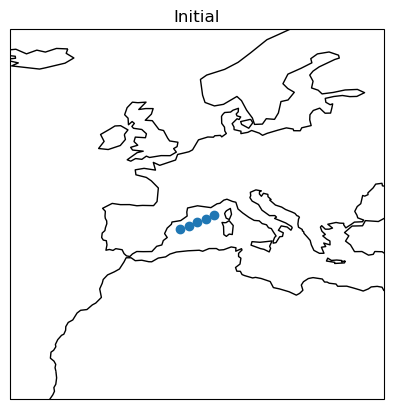

INFO: Compiled ArrayJITParticlebiofouling ==> /var/folders/40/_dzhm_n16gn9bfdpc_8tcpf00000gp/T/parcels-502/libabf020db1731c0163b066ee6d7e2b8d4_0.so
INFO: Output files are stored in ../../data/output_data/biofouling.zarr.
100%|██████████| 259200.0/259200.0 [00:14<00:00, 17416.30it/s] 
/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


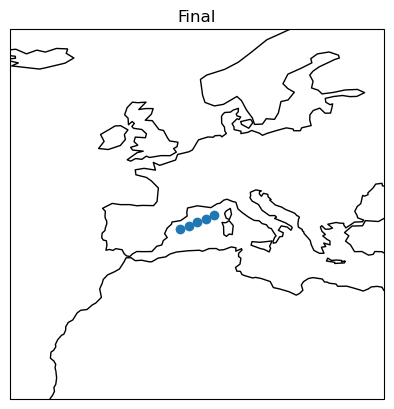

Success with biofouling


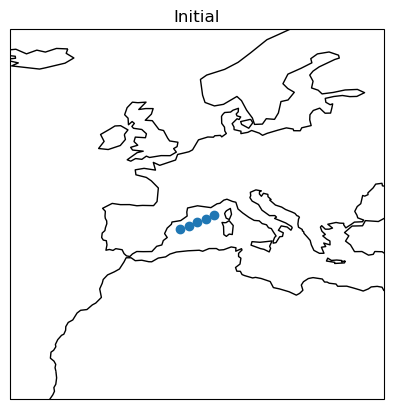

INFO: Compiled ArrayJITParticleStokes_drift ==> /var/folders/40/_dzhm_n16gn9bfdpc_8tcpf00000gp/T/parcels-502/lib4ca96f1c04c9c276b0d565a7a14e762b_0.so
INFO: Output files are stored in ../../data/output_data/Stokes_drift.zarr.
100%|██████████| 259200.0/259200.0 [00:11<00:00, 23515.77it/s]
/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


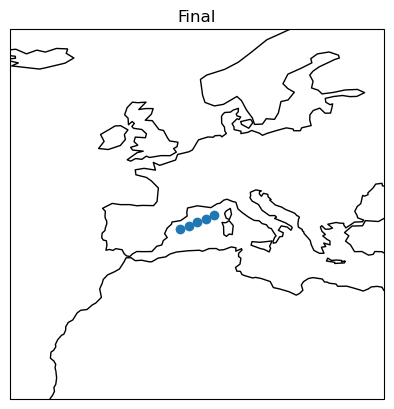

Success with Stokes_drift


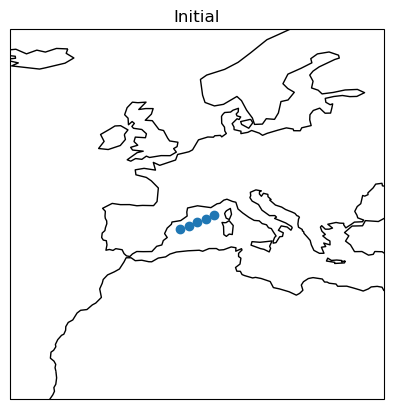

INFO: Compiled ArrayJITParticlewindage_drift ==> /var/folders/40/_dzhm_n16gn9bfdpc_8tcpf00000gp/T/parcels-502/lib34c05d0452602f34650ddb4d4ea4d2e1_0.so
INFO: Output files are stored in ../../data/output_data/windage_drift.zarr.
100%|██████████| 259200.0/259200.0 [00:11<00:00, 23493.18it/s]
/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


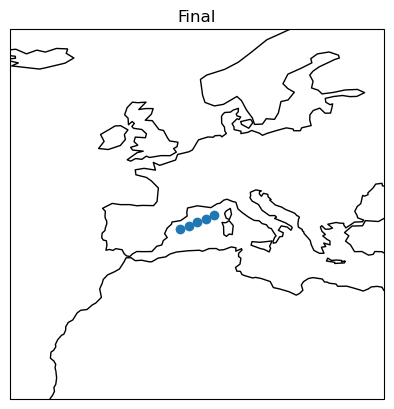

Success with windage_drift


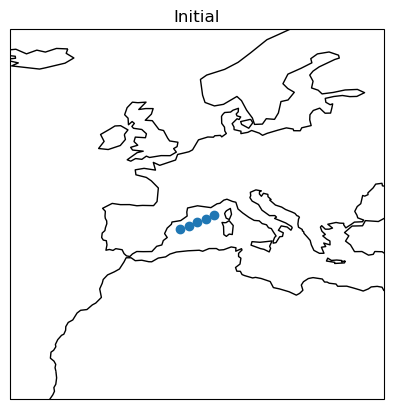

INFO: Compiled ArrayJITParticlevertical_mixing ==> /var/folders/40/_dzhm_n16gn9bfdpc_8tcpf00000gp/T/parcels-502/lib352e51d374d1b1e627c4cad12393f93d_0.so
INFO: Output files are stored in ../../data/output_data/vertical_mixing.zarr.
100%|██████████| 259200.0/259200.0 [00:22<00:00, 11563.26it/s]
/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


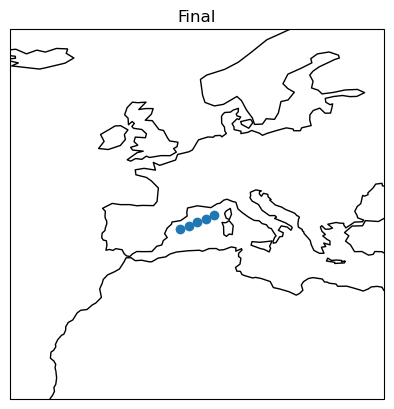

Success with vertical_mixing


In [11]:
for i in range(len_kernels):
    #Reset the particle set and kernels
    pset = create_particleset(fieldset, particle_settings)
    kernels = create_kernel(fieldset, pset)
    
    # Plot locations
    fig = plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.scatter(pset.lon, pset.lat, transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.set_extent([np.min(pset.lon)-25, np.max(pset.lon)+25, np.min(pset.lat)-25, np.max(pset.lat)+25])
    plt.title("Initial")
    plt.show()


    test_kernel=kernels[i]
    try:
        pfile = ParticleFile(user_settings['output_directory']+test_kernel.__name__+'.zarr', pset, outputdt=particle_settings['dt_write'])
        pset.execute(test_kernel, runtime=particle_settings['runtime'], dt=particle_settings['dt_timestep'], output_file=pfile)
        

        #Plot locations final
        fig = plt.figure()
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.scatter(pset.lon, pset.lat, transform=ccrs.PlateCarree())
        ax.coastlines()
        ax.set_extent([np.min(pset.lon)-25, np.max(pset.lon)+25, np.min(pset.lat)-25, np.max(pset.lat)+25])
        plt.title("Final")
        plt.show()
        print("Success with", test_kernel.__name__)

    except Exception as error:
        print("Error with", test_kernel.__name__)
        print(error)

In [12]:

# for test_kernel in kernels:
#     pfile = ParticleFile(user_settings['output_directory']+test_kernel.__name__+'.zarr', pset, outputdt=particle_settings['dt_write'])
#     pset.execute(test_kernel, runtime=particle_settings['runtime'], dt=particle_settings['dt_timestep'], output_file=pfile)
